In [1]:
import pandas as pd
import folium
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

matplotlib.rcParams['axes.unicode_minus'] = False # 그래프 마이너스 기호 깨질때
plt.rcParams['font.family'] ='Malgun Gothic' # 그래프 한글깨질때

In [2]:
people = pd.read_csv('people2.csv')
people.head()

,연도,분기,행정동코드,총생활인구수,남자총생활인구수,여자총생활인구수,남자10대이하,남자10대,남자20대,남자30대,...,여자30대,여자40대,여자50대,여자60대,여자70대이상,역명2,구,행정동_카카오,위도,경도
0,2018.0,1,11110515,16915.294290,8227.184337,8688.109921,567.846055,874.375081,1313.419091,1451.489923,...,1377.710554,1537.888650,1180.920352,907.184817,1298.590529,5호선 광화문역,종로구,청운효자동,37.570545,126.976568
1,2018.0,1,11110530,37143.029930,18371.717040,18771.312930,539.006806,658.146481,2543.368811,4184.675873,...,4079.317323,3145.013017,2368.632391,1732.125248,2398.080394,3호선 경복궁역,종로구,사직동,37.575844,126.973576
2,2018.0,1,11110540,7312.237129,3789.275241,3522.961846,89.591741,303.557513,585.497931,796.388853,...,644.706684,559.407915,530.038208,359.460613,533.030746,NaN,NaN,NaN,NaN,NaN
3,2018.0,1,11110550,13671.288300,6104.449170,7566.839089,312.079882,644.909289,1028.718128,747.115786,...,893.133320,1153.071394,1096.309121,966.133385,1401.794937,NaN,NaN,NaN,NaN,NaN
4,2018.0,1,11110560,20085.594750,8977.798058,11107.796730,516.038965,931.609328,1094.485852,1010.762805,...,1249.925014,1587.829649,1859.483805,1642.791532,2162.461709,NaN,NaN,NaN,NaN,NaN


In [5]:
people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12056 entries, 0 to 12055
Data columns (total 27 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   연도        12050 non-null  float64
 1   분기        12056 non-null  int64  
 2   행정동코드     12056 non-null  int64  
 3   총생활인구수    12056 non-null  float64
 4   남자총생활인구수  12056 non-null  float64
 5   여자총생활인구수  12056 non-null  float64
 6   남자10대이하   12056 non-null  float64
 7   남자10대     12056 non-null  float64
 8   남자20대     12056 non-null  float64
 9   남자30대     12056 non-null  float64
 10  남자40대     12056 non-null  float64
 11  남자50대     12056 non-null  float64
 12  남자60대     12056 non-null  float64
 13  남자70대이상   12056 non-null  float64
 14  여자10대이하   12056 non-null  float64
 15  여자10대     12056 non-null  float64
 16  여자20대     12056 non-null  float64
 17  여자30대     12056 non-null  float64
 18  여자40대     12056 non-null  float64
 19  여자50대     12056 non-null  float64
 20  여자60대     12056 non-null  fl

In [7]:
people.drop([3542,5954,10293,10775,11075,11258], axis=0, inplace=True)
people.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12050 entries, 0 to 12055
Data columns (total 27 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   연도        12050 non-null  float64
 1   분기        12050 non-null  int64  
 2   행정동코드     12050 non-null  int64  
 3   총생활인구수    12050 non-null  float64
 4   남자총생활인구수  12050 non-null  float64
 5   여자총생활인구수  12050 non-null  float64
 6   남자10대이하   12050 non-null  float64
 7   남자10대     12050 non-null  float64
 8   남자20대     12050 non-null  float64
 9   남자30대     12050 non-null  float64
 10  남자40대     12050 non-null  float64
 11  남자50대     12050 non-null  float64
 12  남자60대     12050 non-null  float64
 13  남자70대이상   12050 non-null  float64
 14  여자10대이하   12050 non-null  float64
 15  여자10대     12050 non-null  float64
 16  여자20대     12050 non-null  float64
 17  여자30대     12050 non-null  float64
 18  여자40대     12050 non-null  float64
 19  여자50대     12050 non-null  float64
 20  여자60대     12050 non-null  float64

In [8]:
people['연도'] = people['연도'].astype(int)
people.head()

,연도,분기,행정동코드,총생활인구수,남자총생활인구수,여자총생활인구수,남자10대이하,남자10대,남자20대,남자30대,...,여자30대,여자40대,여자50대,여자60대,여자70대이상,역명2,구,행정동_카카오,위도,경도
0,2018,1,11110515,16915.294290,8227.184337,8688.109921,567.846055,874.375081,1313.419091,1451.489923,...,1377.710554,1537.888650,1180.920352,907.184817,1298.590529,5호선 광화문역,종로구,청운효자동,37.570545,126.976568
1,2018,1,11110530,37143.029930,18371.717040,18771.312930,539.006806,658.146481,2543.368811,4184.675873,...,4079.317323,3145.013017,2368.632391,1732.125248,2398.080394,3호선 경복궁역,종로구,사직동,37.575844,126.973576
2,2018,1,11110540,7312.237129,3789.275241,3522.961846,89.591741,303.557513,585.497931,796.388853,...,644.706684,559.407915,530.038208,359.460613,533.030746,NaN,NaN,NaN,NaN,NaN
3,2018,1,11110550,13671.288300,6104.449170,7566.839089,312.079882,644.909289,1028.718128,747.115786,...,893.133320,1153.071394,1096.309121,966.133385,1401.794937,NaN,NaN,NaN,NaN,NaN
4,2018,1,11110560,20085.594750,8977.798058,11107.796730,516.038965,931.609328,1094.485852,1010.762805,...,1249.925014,1587.829649,1859.483805,1642.791532,2162.461709,NaN,NaN,NaN,NaN,NaN


In [9]:
people.columns

Index(['연도', '분기', '행정동코드', '총생활인구수', '남자총생활인구수', '여자총생활인구수', '남자10대이하',
       '남자10대', '남자20대', '남자30대', '남자40대', '남자50대', '남자60대', '남자70대이상',
       '여자10대이하', '여자10대', '여자20대', '여자30대', '여자40대', '여자50대', '여자60대',
       '여자70대이상', '역명2', '구', '행정동_카카오', '위도', '경도'],
      dtype='object')

In [30]:
people_gu = people.groupby('구')[['총생활인구수']].mean().round(0).astype(int).reset_index()
people_gu_m = people.groupby('구')[['남자총생활인구수']].mean().round(0).astype(int).reset_index()
people_gu_f = people.groupby('구')[['여자총생활인구수']].mean().round(0).astype(int).reset_index()


In [18]:
people_gu.sort_values(by=['총생활인구수'],ascending=False)

,구,총생활인구수
0,강남구,36045
14,서초구,34041
22,종로구,31683
12,마포구,31336
19,영등포구,29825
17,송파구,28755
21,은평구,28123
1,강동구,27265
6,구로구,27057
3,강서구,27055


In [13]:
import os
import folium
import json
import requests
import pandas as pd

In [25]:
r = requests.get('https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json')
c = r.content
seoul_geo = json.loads(c)

In [20]:
m = folium.Map(
    location=[37.566345, 126.977893],
    zoom_start=11.5,
    tiles='cartodbpositron' 
)
folium.Choropleth(
    geo_data = seoul_geo,
    name='choropleth',
    data = people_gu,
    columns = ['구','총생활인구수'],
    key_on='feature.properties.name',
    fill_color='Purples',
    fill_opacity=0.7,
    line_opacity=0.2).add_to(m)
m

In [31]:
m = folium.Map(
    location=[37.566345, 126.977893],
    zoom_start=11.5,
    tiles='cartodbpositron' 
)
folium.Choropleth(
    geo_data = seoul_geo,
    name='choropleth',
    data = people_gu_m,
    columns = ['구','남자총생활인구수'],
    key_on='feature.properties.name',
    fill_color='RdPu',
    fill_opacity=0.7,
    line_opacity=0.2).add_to(m)
m

In [34]:
m = folium.Map(
    location=[37.566345, 126.977893],
    zoom_start=11.5,
    tiles='cartodbpositron' 
)
folium.Choropleth(
    geo_data = seoul_geo,
    name='choropleth',
    data = people_gu_f,
    columns = ['구','여자총생활인구수'],
    key_on='feature.properties.name',
    fill_color='OrRd',
    fill_opacity=0.7,
    line_opacity=0.2).add_to(m)
m

In [35]:
people.head()

,연도,분기,행정동코드,총생활인구수,남자총생활인구수,여자총생활인구수,남자10대이하,남자10대,남자20대,남자30대,...,여자30대,여자40대,여자50대,여자60대,여자70대이상,역명2,구,행정동_카카오,위도,경도
0,2018,1,11110515,16915.294290,8227.184337,8688.109921,567.846055,874.375081,1313.419091,1451.489923,...,1377.710554,1537.888650,1180.920352,907.184817,1298.590529,5호선 광화문역,종로구,청운효자동,37.570545,126.976568
1,2018,1,11110530,37143.029930,18371.717040,18771.312930,539.006806,658.146481,2543.368811,4184.675873,...,4079.317323,3145.013017,2368.632391,1732.125248,2398.080394,3호선 경복궁역,종로구,사직동,37.575844,126.973576
2,2018,1,11110540,7312.237129,3789.275241,3522.961846,89.591741,303.557513,585.497931,796.388853,...,644.706684,559.407915,530.038208,359.460613,533.030746,NaN,NaN,NaN,NaN,NaN
3,2018,1,11110550,13671.288300,6104.449170,7566.839089,312.079882,644.909289,1028.718128,747.115786,...,893.133320,1153.071394,1096.309121,966.133385,1401.794937,NaN,NaN,NaN,NaN,NaN
4,2018,1,11110560,20085.594750,8977.798058,11107.796730,516.038965,931.609328,1094.485852,1010.762805,...,1249.925014,1587.829649,1859.483805,1642.791532,2162.461709,NaN,NaN,NaN,NaN,NaN


In [36]:
people_grouped = people.groupby('역명2')[['총생활인구수','남자총생활인구수','여자총생활인구수']].mean().round(0).astype(int).reset_index()
people_grouped.head()

,역명2,총생활인구수,남자총생활인구수,여자총생활인구수
0,1호선 가산디지털단지역,59041,34309,24732
1,1호선 개봉역,23330,10964,12366
2,1호선 광운대역,25667,11775,13892
3,1호선 구로역,32040,16313,15728
4,1호선 구일역,19507,9304,10203


C:\Users\tjoeun\AppData\Local\Temp\ipykernel_7856\2044462703.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='총생활인구수',y='역명2',data=people_grouped2,orient='h',palette='autumn')


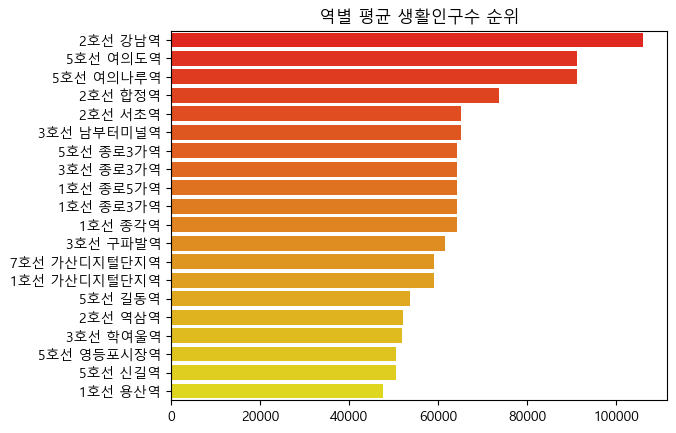

In [43]:
people_grouped2 = people_grouped.sort_values(by=['총생활인구수'],ascending=False)[:20]
ax = sns.barplot(x='총생활인구수',y='역명2',data=people_grouped2,orient='h',palette='autumn')
ax.set(xlabel='',ylabel='')
ax.set_title("역별 평균 생활인구수 순위");

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_7856\1164657062.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='총생활인구수',y='구',data= people_gu2,orient='h',palette='autumn')


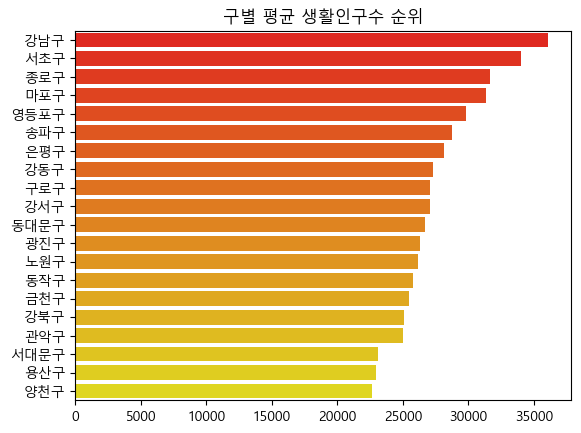

In [44]:
people_gu = people.groupby('구')[['총생활인구수','남자총생활인구수','여자총생활인구수']].mean().round(0).astype(int).reset_index()
people_gu2 = people_gu.sort_values(by=['총생활인구수'],ascending=False)[:20]
ax = sns.barplot(x='총생활인구수',y='구',data= people_gu2,orient='h',palette='autumn')
ax.set(xlabel='',ylabel='')
ax.set_title("구별 평균 생활인구수 순위");